# Øving 7
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Prepare the data

In [18]:


# Fetch dataset
mushroom = pd.read_csv('data/agaricus-lepiota.csv')
mushroom.pop('edibility')  # Drop the target variable
dummies = pd.get_dummies(mushroom)  # Convert categorical variables to

# Get the dataset features
# X = mushroom.data.features

# Initialize encoder
# encoder = OneHotEncoder()

# Encode X
# X_encoded = encoder.fit_transform(X)

# Evalue the k means

In [25]:
#Method for evaluating different kmeans
def evaluate_kmeans(X, max_clusters):
    
    # List for holding the silhouette scores
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
    return silhouette_scores

max_clusters = 30
silhouette_scores = evaluate_kmeans(dummies, max_clusters)

# Plotting silhouette

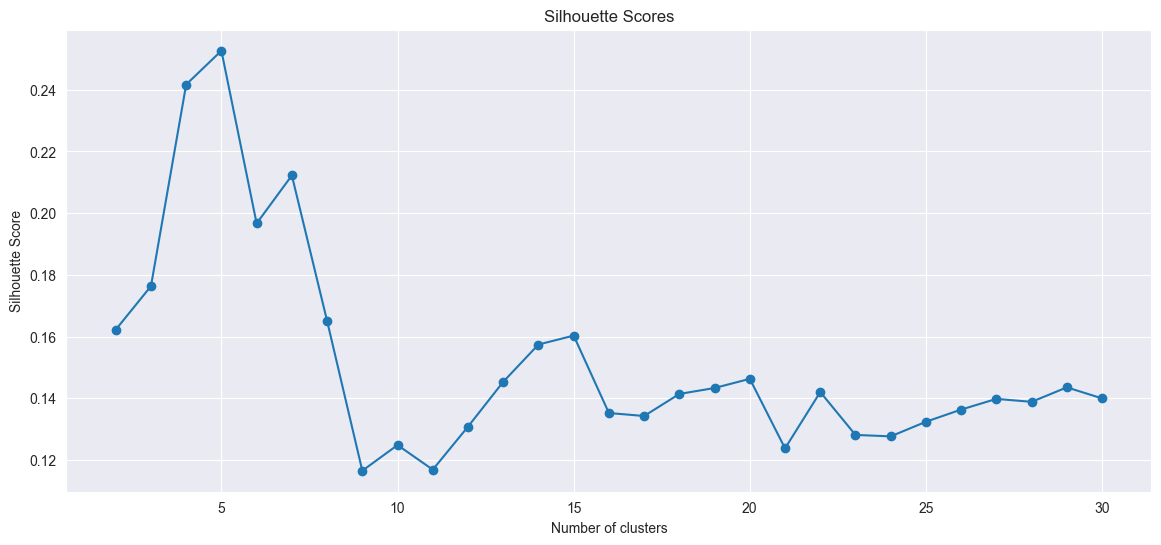

In [20]:
fig, (ax2) = plt.subplots(1, 1, figsize=(14, 6))

# Plot Silhouette Scores
ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

# Plotting the clusters 2D

In [24]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 since range starts from 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(dummies)

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dummies)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.title(f'K-Means Clustering with {optimal_clusters} clusters (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show.()

SyntaxError: invalid syntax (2116767175.py, line 16)

# Plotting the clusters 3D

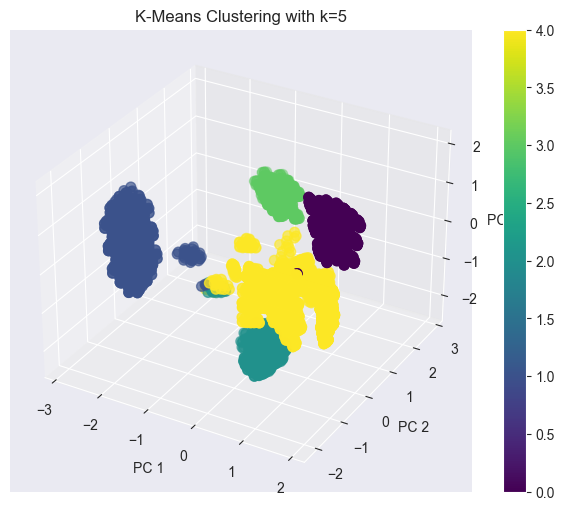

In [22]:
# Visualize clusters using PCA
pca_3d = PCA(n_components=3)  # Further reduce to 3 components for visualization
X_pca_3d = pca_3d.fit_transform(dummies)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=cluster_labels, s=50, cmap='viridis')
ax.set_title(f"K-Means Clustering with k={optimal_clusters}")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.show()